In [176]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
from io import StringIO
import os

In [198]:
# from ipywidgets import FileUpload
# from IPython.display import display
import io

In [211]:
def read_sales_data(file):
    """Читает данные о продажах из файла и возвращает список продаж."""
    sales = []
    try:
        reader = csv.reader(file)
        first_row = True
        for row in reader:
            if first_row:
                row[0] = row[0].replace('\ufeff', '')
                first_row = False
            # Очистка пробелов и проверка на корректность длины строки
            row = [item.strip() for item in row]
            if len(row) == 4:  # строка содержит 4 значения
                try:
                    product_name, quantity, price, date = row
                    sales.append({
                        'product_name': product_name,
                        'quantity': int(quantity),
                        'price': float(price),
                        'date': date
                    })
                except ValueError as ve:
                    print(f"Ошибка преобразования значений в строке {row}: {ve}")
            else:
                print(f"Некорректное количество значений в строке: {row}")
    except Exception as e:
        print(f"Ошибка при чтении данных: {e}")
    return sales


In [212]:
def total_sales_per_product(sales_data):
    """Вычисляет общую сумму продаж по каждому продукту."""
    total_sales = defaultdict(float)
    for sale in sales_data:
        product = sale['product_name']
        total_sales[product] += sale['quantity'] * sale['price']
    return dict(total_sales)

def sales_over_time(sales_data):
    """Вычисляет общую сумму продаж по дням."""
    sales_by_date = defaultdict(float)
    for sale in sales_data:
        date = sale['date']
        sales_by_date[date] += sale['quantity'] * sale['price']
    return dict(sales_by_date)

In [213]:

def find_max_sales(total_sales_per_product, sales_over_time):
    """Находит продукт с наибольшей выручкой и день с наибольшей суммой продаж."""
    max_product = max(total_sales_per_product, key=total_sales_per_product.get)
    max_product_sales = total_sales_per_product[max_product]

    max_date = max(sales_over_time, key=sales_over_time.get)
    max_date_sales = sales_over_time[max_date]

    return max_product, max_product_sales, max_date, max_date_sales
    

In [214]:
def plot_sales(total_sales_per_product, sales_over_time):
    """Строит графики общей суммы продаж по продуктам и дням."""
    # График общей суммы продаж по продуктам
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(total_sales_per_product.keys(), total_sales_per_product.values(), color='skyblue')
    plt.xlabel('Продукт')
    plt.ylabel('Сумма продаж')
    plt.title('Общая сумма продаж по продуктам')
    plt.xticks(rotation=45)

    # График общей суммы продаж по дням
    plt.subplot(1, 2, 2)
    plt.plot(list(sales_over_time.keys()), list(sales_over_time.values()), marker='o', color='orange')
    plt.xlabel('Дата')
    plt.ylabel('Сумма продаж')
    plt.title('Общая сумма продаж по дням')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [215]:

# file = FileUpload(accept='.csv', multiple=False)
# display(uploader)

In [216]:
# print("Текущий рабочий каталог:", os.getcwd())

In [217]:
file_path = "test_data.csv"

In [218]:
try:
    with open(file_path, newline='', encoding='utf-8') as file:
        # Выводим содержимое файла для отладки
        content = file.read()
        print("Содержимое файла:")
        print(content)
        # Возвращаемся к началу файла для чтения csv.reader
        file.seek(0)
        sales_data = read_sales_data(file)
    # Выводим данные о продажах
    print("Данные о продажах:", sales_data)
except FileNotFoundError:
    print(f"Файл {file_path} не найден в текущем рабочем каталоге.")
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")

Содержимое файла:
﻿яблоки, 10, 15, 2024-06-21
груши, 16, 11, 2024-06-22
сливы, 20, 15, 2024-06-19
печенье, 16, 23, 2024-06-20
сливы, 21, 15, 2024-06-16
яблоки, 16, 15, 2024-06-20
конфеты Рот-Фронт, 11, 22, 2024-06-24
сливы, 6, 15, 2024-06-20
Данные о продажах: [{'product_name': 'яблоки', 'quantity': 10, 'price': 15.0, 'date': '2024-06-21'}, {'product_name': 'груши', 'quantity': 16, 'price': 11.0, 'date': '2024-06-22'}, {'product_name': 'сливы', 'quantity': 20, 'price': 15.0, 'date': '2024-06-19'}, {'product_name': 'печенье', 'quantity': 16, 'price': 23.0, 'date': '2024-06-20'}, {'product_name': 'сливы', 'quantity': 21, 'price': 15.0, 'date': '2024-06-16'}, {'product_name': 'яблоки', 'quantity': 16, 'price': 15.0, 'date': '2024-06-20'}, {'product_name': 'конфеты Рот-Фронт', 'quantity': 11, 'price': 22.0, 'date': '2024-06-24'}, {'product_name': 'сливы', 'quantity': 6, 'price': 15.0, 'date': '2024-06-20'}]


In [219]:
print(sales_data)


[{'product_name': 'яблоки', 'quantity': 10, 'price': 15.0, 'date': '2024-06-21'}, {'product_name': 'груши', 'quantity': 16, 'price': 11.0, 'date': '2024-06-22'}, {'product_name': 'сливы', 'quantity': 20, 'price': 15.0, 'date': '2024-06-19'}, {'product_name': 'печенье', 'quantity': 16, 'price': 23.0, 'date': '2024-06-20'}, {'product_name': 'сливы', 'quantity': 21, 'price': 15.0, 'date': '2024-06-16'}, {'product_name': 'яблоки', 'quantity': 16, 'price': 15.0, 'date': '2024-06-20'}, {'product_name': 'конфеты Рот-Фронт', 'quantity': 11, 'price': 22.0, 'date': '2024-06-24'}, {'product_name': 'сливы', 'quantity': 6, 'price': 15.0, 'date': '2024-06-20'}]


In [220]:
total_sales = total_sales_per_product(sales_data)
sales_by_date = sales_over_time(sales_data)


In [221]:
total_sales, sales_by_date

({'яблоки': 390.0,
  'груши': 176.0,
  'сливы': 705.0,
  'печенье': 368.0,
  'конфеты Рот-Фронт': 242.0},
 {'2024-06-21': 150.0,
  '2024-06-22': 176.0,
  '2024-06-19': 300.0,
  '2024-06-20': 698.0,
  '2024-06-16': 315.0,
  '2024-06-24': 242.0})

In [222]:
max_product, max_product_sales, max_date, max_date_sales = find_max_sales(total_sales, sales_by_date)

In [223]:
print(f"Продукт с наибольшей выручкой: {max_product} ({max_product_sales:.2f})")
print(f"День с наибольшей суммой продаж: {max_date} ({max_date_sales:.2f})")

Продукт с наибольшей выручкой: сливы (705.00)
День с наибольшей суммой продаж: 2024-06-20 (698.00)


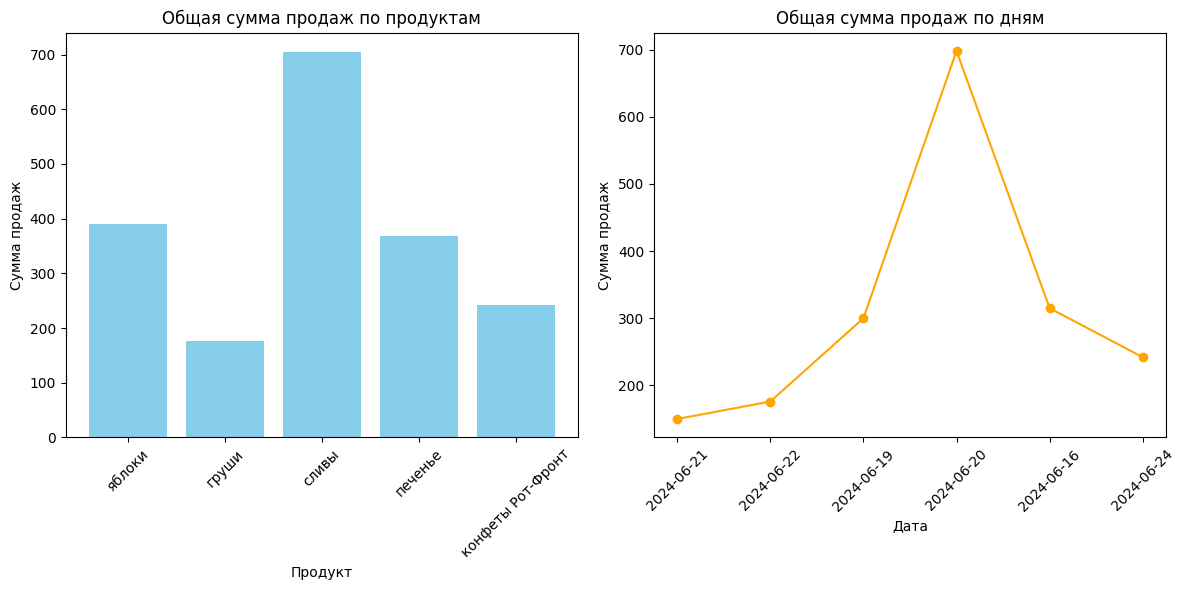

In [224]:
plot_sales(total_sales, sales_by_date)